In [246]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [247]:
df = pd.read_csv('Country-data (1).csv')

In [248]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [249]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Text(0.5, 1.0, 'Corellation Heatmap')

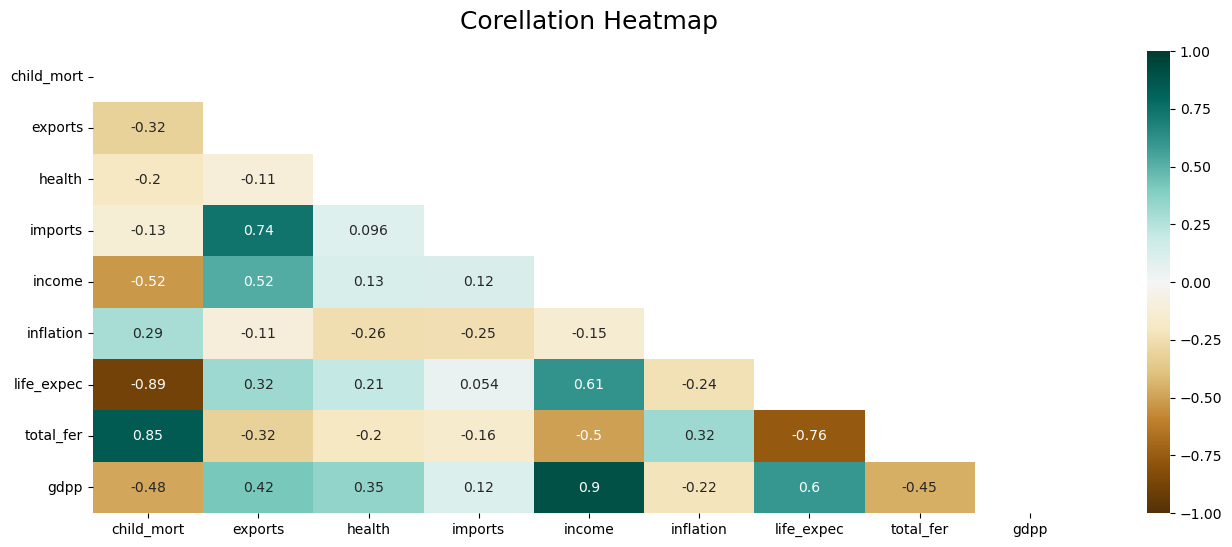

In [251]:
plt.figure(figsize = (16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool_))
heatmap = sns.heatmap(df.corr(), mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Corellation Heatmap', fontdict = {'fontsize': 18}, pad = 16)

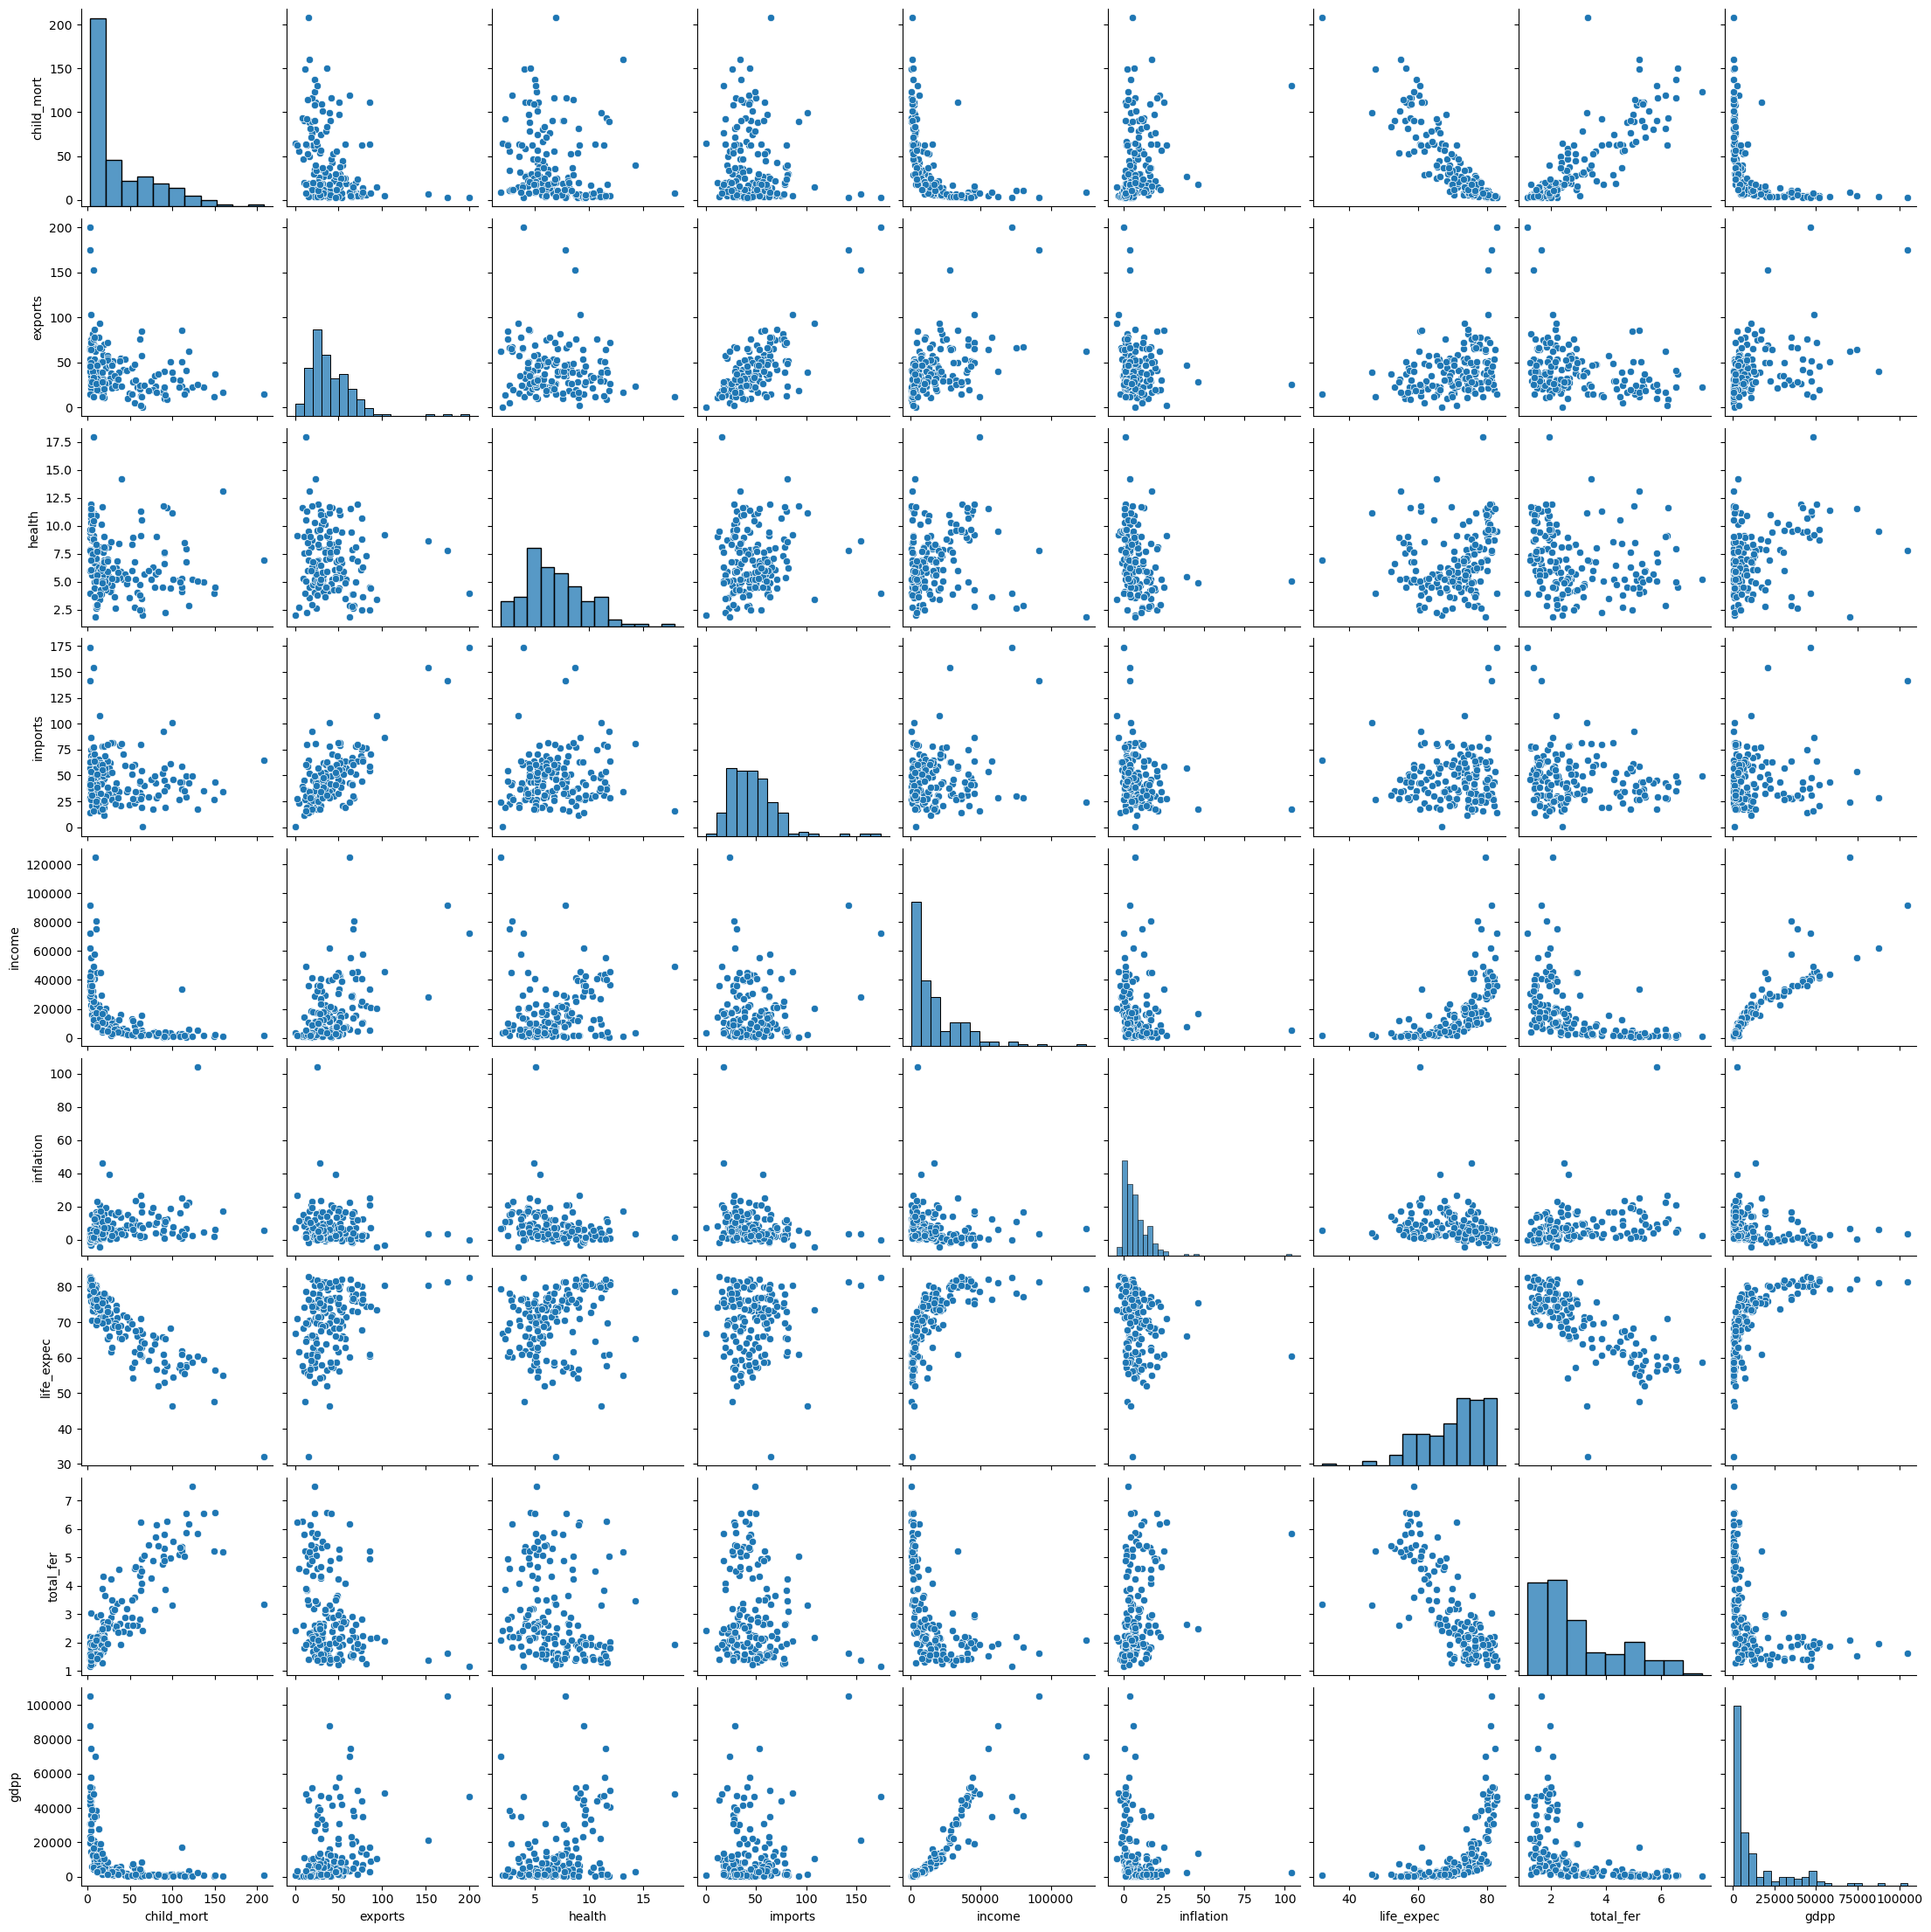

In [252]:
sns.pairplot(df)

In [253]:
df.set_index('country',inplace=True)

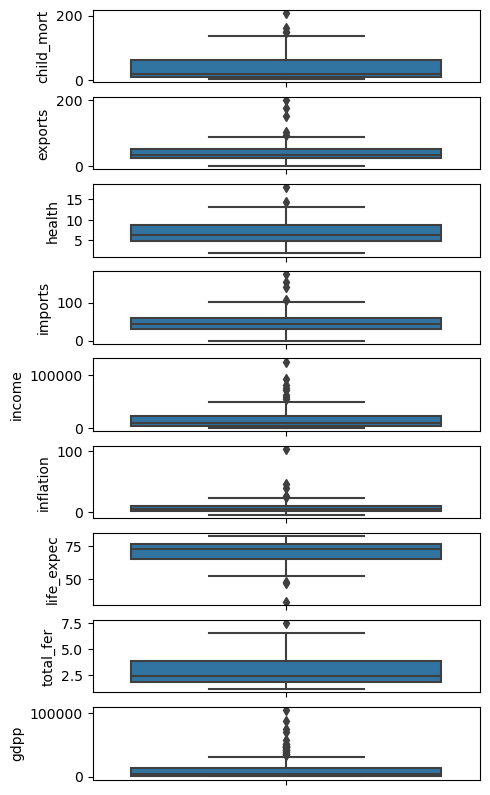

In [254]:
column_names = df.columns
fig,axes = plt.subplots(nrows=len(column_names),figsize=(5,10))
for i in range(len(column_names)):
    sns.boxplot(ax=axes[i],y = column_names[i],data=df)

In [255]:
def outlier_treatment(datacolumn):
    sorted (datacolumn)
    Q1,Q3 = np.percentile(datacolumn, [25,75])
    IQR =Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [256]:
for col in df.columns: 
    lowerbound,upperbound = outlier_treatment(df[col])
    df[col] = np.clip(df[col],a_min=lowerbound,a_max=upperbound)

In [290]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [258]:
df.iloc[:, 0]

country
Afghanistan             90.2
Albania                 16.6
Algeria                 27.3
Angola                 119.0
Antigua and Barbuda     10.3
                       ...  
Vanuatu                 29.2
Venezuela               17.1
Vietnam                 23.3
Yemen                   56.3
Zambia                  83.1
Name: child_mort, Length: 167, dtype: float64

In [293]:
scale = MinMaxScaler()
scaled = scale.fit_transform(df)
scaled_df = pd.DataFrame(scaled)
scaled_df.columns = df.columns
scaled_df.set_index(df.iloc[:, 0],inplace = True)
scaled_df.head()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [237]:
# scale = StandardScaler()
# scaled_data = scale.fit_transform(df.iloc[:,1:])
# scaled_data = pd.DataFrame(scaled_data)
# scaled_data.columns = df.columns[1:]
# scaled_data.head()


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [268]:
from sklearn.cluster import KMeans
 

In [269]:
 import numpy as np
# df = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])
# kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(df)
# kmeans.labels_
# kmeans.predict([[0, 0], [12, 3]])
# kmeans.cluster_centers_

In [270]:
k_means = KMeans(n_clusters=3,random_state=123).fit(df)

In [271]:
k_means.labels_

array([1, 1, 1, 0, 2, 0])

In [272]:
scale

MinMaxScaler()

KMeans

In [276]:
labels = k_means.labels_

df['KMeans'] = labels

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [274]:
df['KMeans']=k_means.labels_

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [238]:
#df[df['KMeans']==0] 
#df[df['KMeans']==1] 
df[df['KMeans']==2] 
#0=underdeveloping
#1=developed
#2=developing


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [232]:
KMeans = []
for i in range (df.shape[0]):
    if df.KMeans[:][i]==0:
        KMeans.append('underdeveloping')
    elif df.KMeans[:][i]==1:
        KMeans.append('developed')
    else:
        KMeans.append('developing')
df['Kmeans'] = KMeans

AttributeError: 'numpy.ndarray' object has no attribute 'KMeans'

In [233]:
df['Kmeans'].value_counts()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [141]:
df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans,Kmeans
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.440,56.2,5.82,553,0,underdeveloping
Albania,16.6,28.0,6.55,48.6,9930.0,4.490,76.3,1.65,4090,0,underdeveloping
Algeria,27.3,38.4,4.17,31.4,12900.0,16.100,76.5,2.89,4460,0,underdeveloping
Angola,119.0,62.3,2.85,42.9,5900.0,22.400,60.1,6.16,3530,0,underdeveloping
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200,2,developing
Argentina,14.5,18.9,8.10,16.0,18700.0,20.900,75.8,2.37,10300,2,developing
Armenia,18.1,20.8,4.40,45.3,6700.0,7.770,73.3,1.69,3220,0,underdeveloping
Australia,4.8,19.8,8.73,20.9,41400.0,1.160,82.0,1.93,33130,1,developed
Austria,4.3,51.3,11.00,47.8,43200.0,0.873,80.5,1.44,33130,1,developed


In [142]:
df.shape[0]

167

In [143]:
df.drop('KMeans',inplace=True,axis=1)

In [144]:
df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.440,56.2,5.82,553,underdeveloping
Albania,16.6,28.0,6.55,48.6,9930.0,4.490,76.3,1.65,4090,underdeveloping
Algeria,27.3,38.4,4.17,31.4,12900.0,16.100,76.5,2.89,4460,underdeveloping
Angola,119.0,62.3,2.85,42.9,5900.0,22.400,60.1,6.16,3530,underdeveloping
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200,developing
Argentina,14.5,18.9,8.10,16.0,18700.0,20.900,75.8,2.37,10300,developing
Armenia,18.1,20.8,4.40,45.3,6700.0,7.770,73.3,1.69,3220,underdeveloping
Australia,4.8,19.8,8.73,20.9,41400.0,1.160,82.0,1.93,33130,developed
Austria,4.3,51.3,11.00,47.8,43200.0,0.873,80.5,1.44,33130,developed


Hierarchical clustering

In [145]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [147]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(df.drop('Kmeans',axis=1))

In [148]:
y_hc

array([1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1,
       1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 1, 2,
       1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1], dtype=int64)

In [149]:
df['Hierarchical'] = y_hc

In [150]:
df[df['Hierarchical'] ==0].tail(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans,Hierarchical
country,,,,,,,,,,,
Saudi Arabia,15.7,49.600,4.29,33.000,45400.0,17.200,75.1,2.96,19300,developed,0
Singapore,2.8,92.675,3.96,101.575,51967.5,-0.046,82.7,1.15,33130,developed,0
Slovenia,3.2,64.300,9.41,62.900,28700.0,-0.987,79.5,1.57,23400,developing,0
South Korea,4.1,49.400,6.93,46.200,30400.0,3.160,80.1,1.23,22100,developing,0
Spain,3.8,25.500,9.54,26.800,32500.0,0.160,81.9,1.37,30700,developed,0
Sweden,3.0,46.200,9.63,40.700,42900.0,0.991,81.5,1.98,33130,developed,0
Switzerland,4.5,64.000,11.50,53.300,51967.5,0.317,82.2,1.52,33130,developed,0
United Arab Emirates,8.6,77.700,3.66,63.600,51967.5,12.500,76.5,1.87,33130,developed,0
United Kingdom,5.2,28.200,9.64,30.800,36200.0,1.570,80.3,1.92,33130,developed,0


In [151]:
Hierarchical = []
for i in range (df.shape[0]):
    if df.Hierarchical[:][i]==0:
        Hierarchical.append('developed')
    elif df.Hierarchical[:][i]==1:
        Hierarchical.append('underdeveloping')
    else:
        Hierarchical.append('developing')
df['Hierarchical'] = Hierarchical

In [152]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans,Hierarchical
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,underdeveloping,underdeveloping
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,underdeveloping,underdeveloping
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,underdeveloping,underdeveloping
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,underdeveloping,underdeveloping
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,developing,developing


In [177]:
social=df.drop(['exports','imports','income','inflation','gdpp', 'Kmeans','Hierarchical'],axis=1)
economics=df.drop(['child_mort','health','life_expec','total_fer','Kmeans','Hierarchical'],axis=1)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [154]:
social

,child_mort,health,life_expec,total_fer
country,,,,
Afghanistan,90.2,7.58,56.2,5.82
Albania,16.6,6.55,76.3,1.65
Algeria,27.3,4.17,76.5,2.89
Angola,119.0,2.85,60.1,6.16
Antigua and Barbuda,10.3,6.03,76.8,2.13
...,...,...,...,...
Vanuatu,29.2,5.25,63.0,3.50
Venezuela,17.1,4.91,75.4,2.47
Vietnam,23.3,6.84,73.1,1.95


PCA

In [173]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)

In [175]:
social_pca = pca.fit_transform(social)
economics_pca = pca.fit_transform(economics)

In [176]:
df_soc_pca = pd.DataFrame(data=social_pca, columns=['social'])
df_soc_pca.set_index(df.iloc[:, 0], inplace=True) 
df_eco_pca = pd.DataFrame(data=economics_pca, columns=['economics'])
df_eco_pca.set_index(df.iloc[:, 0], inplace=True) 

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [159]:
df_eco_pca

,economics
child_mort,
90.2,-17326.279085
16.6,-8553.607435
27.3,-5959.397556
119.0,-12108.561961
10.3,3650.872146
...,...
29.2,-14801.191200
17.1,2357.488359
23.3,-14570.916414


In [160]:
df_soc_pca

,social
child_mort,
90.2,54.358072
16.6,-21.815868
27.3,-11.287537
119.0,81.918922
10.3,-28.065164
...,...
29.2,-6.805841
17.1,-21.099480
23.3,-14.621794


In [161]:
visual_data = pd.concat([df['Kmeans'],df['Hierarchical']], axis = 1)

In [162]:
visual_data = pd.concat([visual_data, df_soc_pca, df_eco_pca], axis=1)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [43]:
visual_data

,Kmeans,Hierarchical
country,,
Afghanistan,underdeveloping,underdeveloping
Albania,underdeveloping,underdeveloping
Algeria,underdeveloping,underdeveloping
Angola,underdeveloping,underdeveloping
Antigua and Barbuda,developing,developing
...,...,...
Vanuatu,underdeveloping,underdeveloping
Venezuela,developing,developing
Vietnam,underdeveloping,underdeveloping


KeyError: 'social'

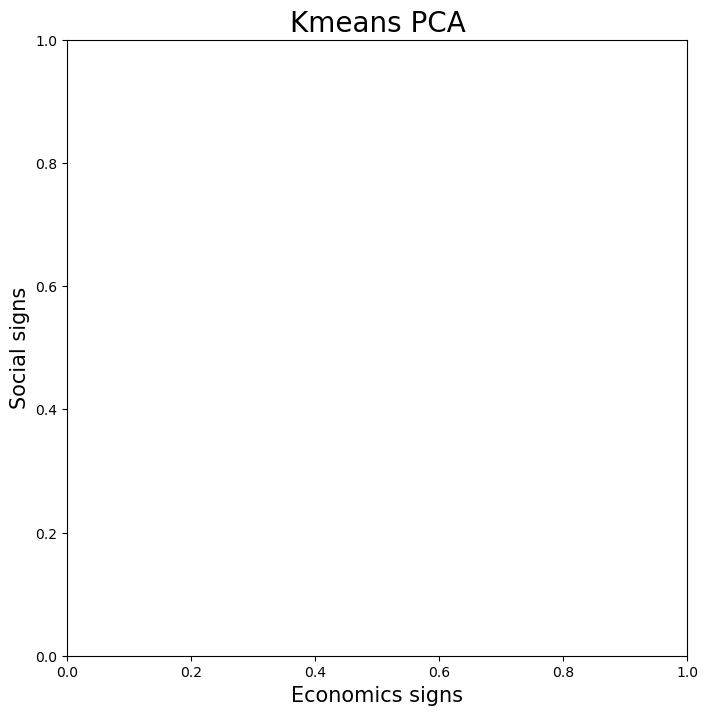

In [163]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Economics signs', fontsize = 15)
ax.set_ylabel('Social signs', fontsize = 15)
ax.set_title('Kmeans PCA', fontsize = 20)
targets = ['underdeveloping', 'developing', 'developed']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = visual_data['Kmeans'] == target
    ax.scatter(visual_data.loc[indicesToKeep, 'social']
               , visual_data.loc[indicesToKeep, 'economics']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

KeyError: 'social'

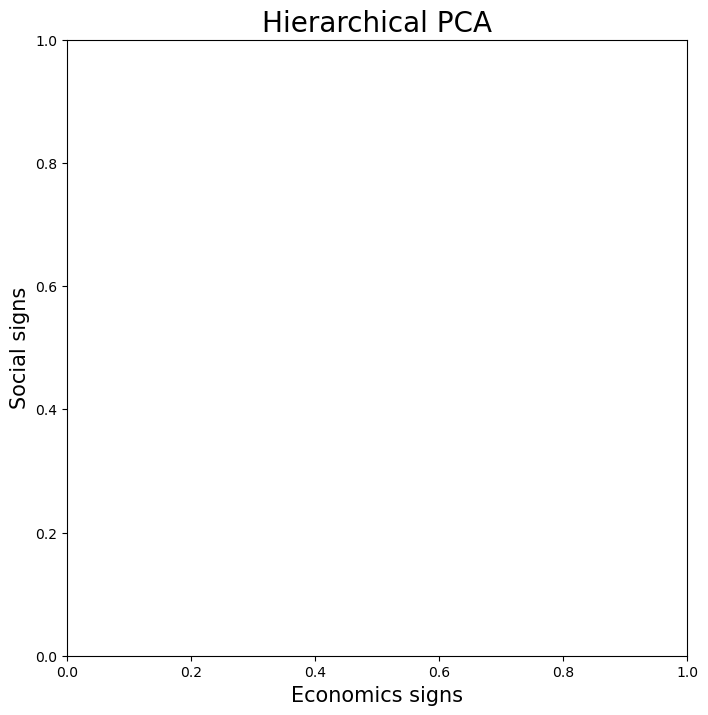

In [93]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Economics signs', fontsize = 15)
ax.set_ylabel('Social signs', fontsize = 15)
ax.set_title('Hierarchical PCA', fontsize = 20)
targets = ['underdeveloping', 'developing', 'developed']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = visual_data['Hierarchical'] == target
    ax.scatter(visual_data.loc[indicesToKeep, 'social']
               , visual_data.loc[indicesToKeep, 'economics']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()